<a href="https://colab.research.google.com/github/guilhermebr84/XPE_bootcamp_desafioDESM1_analistadedados/blob/main/2023_05_18_DESM1_Desafio_do_M%C3%B3dulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DESM1 - Desafio do Módulo 1

1. Coletar e inserir na plataforma os arquivos:

a. dados_perfil.xlsx

b. dados_medicos.csv

c. unidades_federativas_do_Brasil.csv

2. Analisar os dados coletados.

3. Avaliar a correlação entre as variáveis.

4. Criar algoritmo de k-means com as configurações:

a. random_state=0, init='k-means++'

5. Responder às questões teóricas e práticas do trabalho.

6. Realizar a segmentação dos pacientes.

7. Análise dos dados de acordo com clusters criados.


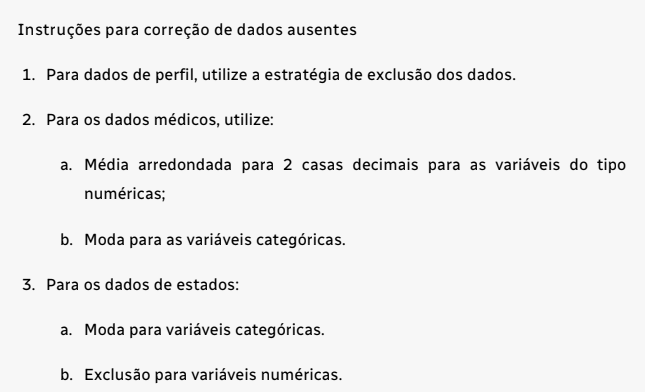

In [ ]:
# importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
dados_medicos = pd.read_csv('/content/dados_medicos.csv', sep=';', encoding='latin-1')
dados_medicos.head()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco
0,1,31.7,139,70,Normal,162.1,262.8,152.6,Sim
1,2,28.1,93,66,Normal,193.4,199.2,152.4,Sim
2,3,26.1,109,86,Normal,162.2,223.4,190.1,Não
3,4,31.6,159,87,Normal,155.4,189.7,130.2,Não
4,5,37.2,99,63,Normal,161.5,218.3,146.0,Não


In [ ]:
dados_medicos.describe()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,peso,Colesterol Total,Triglicerídeos
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,989.000000,1000.000000
mean,500.500000,28.909900,130.038000,80.299000,150.796100,193.219717,147.386100
std,288.819436,6.431569,23.175151,11.966737,26.447694,32.007185,36.455399
min,1.000000,18.000000,90.000000,60.000000,67.500000,96.400000,49.200000
25%,250.750000,23.300000,111.000000,70.000000,133.975000,173.000000,122.675000
50%,500.500000,28.500000,129.000000,81.000000,150.750000,194.300000,147.500000
75%,750.250000,34.900000,150.000000,90.000000,169.425000,214.300000,170.350000
max,1000.000000,40.000000,170.000000,100.000000,234.400000,293.200000,259.300000


In [ ]:
dados_medicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             1000 non-null   int64  
 1   IMC                            1000 non-null   float64
 2   Pressão Sistólica              1000 non-null   int64  
 3   Pressão Diastólica             1000 non-null   int64  
 4   Nível de Açúcar                1000 non-null   object 
 5   peso                           1000 non-null   float64
 6   Colesterol Total               989 non-null    float64
 7   Triglicerídeos                 1000 non-null   float64
 8   Histórico Familiar - Cardiaco  1000 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 70.4+ KB


In [ ]:
dados_medicos.isna().sum()

ID                               0
IMC                              0
Pressão Sistólica                0
Pressão Diastólica               0
Nível de Açúcar                  0
peso                             0
Colesterol Total                 0
Triglicerídeos                   0
Histórico Familiar - Cardiaco    0
dtype: int64

In [ ]:
dados_medicos.loc[dados_medicos['Colesterol Total'].isnull()]

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco


In [ ]:
# correcao de dados_medicos - media arredondada
dados_medicos['Colesterol Total'].mean()

193.21971688574317

In [ ]:
media_dados_medicos = dados_medicos['Colesterol Total'].mean()
print(media_dados_medicos)

193.21971688574317


In [ ]:
round(media_dados_medicos,2)

193.22

In [ ]:
dados_medicos['Colesterol Total'].fillna(round(media_dados_medicos,2), inplace=True)

<Axes: title={'center': 'correlacao entre colesterol e peso'}>

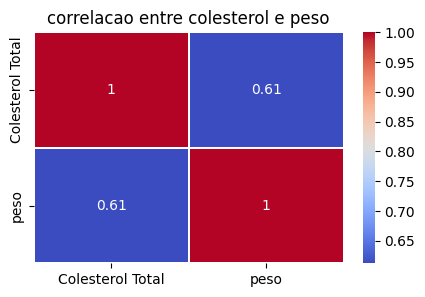

In [ ]:
# gerar correlacao entre peso e colesterol
plt.figure(figsize=(5,3))
plt.title('correlacao entre colesterol e peso')
dados_correlacao_dados_medicos = dados_medicos[['Colesterol Total', 'peso']]
sns.heatmap(dados_correlacao_dados_medicos.corr(), cmap='coolwarm', linewidths=0.1, linecolor='white', annot=True)

In [ ]:
pacientes = pd.read_excel('/content/dados_perfil.xlsx')
pacientes.head()

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf
0,1,M,74.0,Moderado,Atividade Moderada,31
1,2,F,34.0,Baixo,Atividade Moderada,35
2,3,M,18.0,Moderado,Atividade Moderada,29
3,4,M,72.0,Baixo,Sedentário,15
4,5,F,63.0,Baixo,Atividade Moderada,41


In [ ]:
pacientes.describe()

,ID,Idade,cod_uf
count,1000.000000,990.000000,1000.000000
mean,500.500000,48.887879,29.289000
std,288.819436,17.940937,13.041993
min,1.000000,18.000000,11.000000
25%,250.750000,33.000000,17.000000
50%,500.500000,49.000000,27.000000
75%,750.250000,64.000000,41.000000
max,1000.000000,80.000000,53.000000


In [ ]:
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1000 non-null   int64  
 1   Gênero             1000 non-null   object 
 2   Idade              990 non-null    float64
 3   Consumo de Álcool  1000 non-null   object 
 4   Atividade Física   1000 non-null   object 
 5   cod_uf             1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [ ]:
pacientes.isna().sum()

ID                   0
Gênero               0
Idade                0
Consumo de Álcool    0
Atividade Física     0
cod_uf               0
dtype: int64

In [ ]:
pacientes.loc[pacientes['Idade'].isnull()]

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf
92,93,F,NaN,Baixo,Atividade Moderada,33
162,163,M,NaN,Baixo,Sedentário,41
163,164,F,NaN,Baixo,Ativo,28
164,165,F,NaN,Baixo,Atividade Moderada,41
205,206,M,NaN,Baixo,Ativo,12
833,834,M,NaN,Moderado,Ativo,53
841,842,F,NaN,Alto,Atividade Moderada,43
894,895,F,NaN,Moderado,Atividade Moderada,43
971,972,M,NaN,Alto,Atividade Moderada,53
995,996,F,NaN,Moderado,Sedentário,23


In [ ]:
# corrigir dados null com exclusão
pacientes.dropna(subset=['Idade'], inplace=True)

In [ ]:
ufbrasil = pd.read_csv('/content/unidades_federativas_do_Brasil.csv', sep=';', encoding='latin-1')
ufbrasil.head()

,codigo_uf,uf,nome,latitude,longitude,regiao,pais
0,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
1,12,AC,Acre,-8.77,-70.55,Norte,Brasil
2,13,AM,Amazonas,-3.47,-65.10,Norte,Brasil
3,14,RR,Roraima,1.99,-61.33,Norte,Brasil
4,15,PA,Pará,-3.79,-52.48,Norte,Brasil


In [ ]:
ufbrasil.describe()

,codigo_uf,latitude,longitude
count,27.000000,27.000000,27.000000
mean,29.111111,-12.381111,-48.410370
std,13.024631,8.476122,9.291479
min,11.000000,-30.170000,-70.550000
25%,19.000000,-18.645000,-52.990000
50%,27.000000,-10.570000,-48.260000
75%,38.000000,-6.205000,-41.025000
max,53.000000,1.990000,-36.590000


In [ ]:
ufbrasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   codigo_uf  27 non-null     int64  
 1   uf         27 non-null     object 
 2   nome       27 non-null     object 
 3   latitude   27 non-null     float64
 4   longitude  27 non-null     float64
 5   regiao     27 non-null     object 
 6   pais       27 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.6+ KB


In [ ]:
ufbrasil.isna().sum()

codigo_uf    0
uf           0
nome         0
latitude     0
longitude    0
regiao       0
pais         0
dtype: int64